 <h1><center><strong> NLP - UCI ML Drug Review</strong></center></h1>
 <hr style="color:#E1CF01">

## Step1: Importing Libraries & Reading Data
<hr style="color:#E1CF01">

In [26]:
nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x09C45388>>

In [27]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmmm9\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text 
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import numpy as np


In [7]:
# read data stored in file name Car-details.csv using pd.read_csv, then store the data in df dataframe
df = pd.read_csv('drugsComTrain_raw.csv')

In [8]:
#show first ten dataframe content
df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [9]:
# Show last five rows
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116


In [10]:
df.shape

(161297, 7)

In [11]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.2+ MB


In [12]:
df.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


## Step2: Data Cleaning
<hr style="color:#E1CF01">

In [13]:
# check to null values 
df.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [14]:
df.dropna(subset=['condition'],inplace=True)

In [15]:
# Assess if there are any duplicates.
sum(df.duplicated())

0

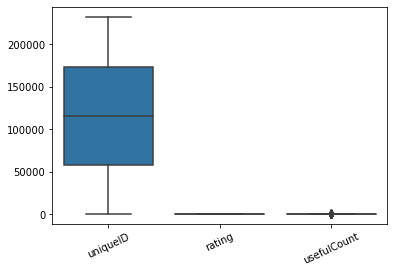

In [16]:
#Check Outlier
sns.boxplot(data=df)
plt.xticks(rotation=25);

## Step5: Text Cleaning
<hr style="color:#E1CF01">

In [ ]:

pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [20]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&$#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [22]:
df['review_clean'] = review_clean(df['review'])


<ipython-input-20-a633391706d8>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  pattern_remove = lower.str.replace("&$#039;", "")
<ipython-input-20-a633391706d8>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
<ipython-input-20-a633391706d8>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
<ipython-input-20-a633391706d8>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
<ipython-input-20-a633391706d8>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
<ipython-input-20-a633391706d8>:21: FutureWar

In [29]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [30]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df['review_clean'] = df['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [31]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [33]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take anoth oral contracept 21 pill cycl ha...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,first time use form birth control 039 glad wen...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,suboxon complet turn life around feel healthie...


## Step3: Sentiment Analysis

<hr style="color:#E1CF01">

In [39]:
nltk.download("vader_lexicon")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mmmm9\AppData\Roaming\nltk_data...


True

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["review_clean"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["review_clean"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["review_clean"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["review_clean"]]

df.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,Positive,Negative,Neutral,Compound,Sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,side effect take combin bystol 5 mg fish oil,0.000,0.000,1.000,0.0000,Neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv becam concern ...,0.121,0.056,0.823,0.6929,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take anoth oral contracept 21 pill cycl ha...,0.044,0.000,0.956,0.5106,Positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,first time use form birth control 039 glad wen...,0.069,0.083,0.849,0.1027,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,suboxon complet turn life around feel healthie...,0.208,0.070,0.723,0.8934,Positive


In [52]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
d["Sentiment"] = sentiment
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,Positive,Negative,Neutral,Compound,Sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,side effect take combin bystol 5 mg fish oil,0.000,0.000,1.000,0.0000,Neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv becam concern ...,0.121,0.056,0.823,0.6929,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take anoth oral contracept 21 pill cycl ha...,0.044,0.000,0.956,0.5106,Positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,first time use form birth control 039 glad wen...,0.069,0.083,0.849,0.1027,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,suboxon complet turn life around feel healthie...,0.208,0.070,0.723,0.8934,Positive


In [54]:
print(df["Sentiment"].value_counts())

Positive    82168
Negative    67464
Neutral     10766
Name: Sentiment, dtype: int64


## Step4: EDA
<hr style="color:#E1CF01">

In [55]:
condition_df = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

In [56]:
condition_df

condition
Not Listed / Othe                              214
Pain                                           200
Birth Control                                  172
High Blood Pressure                            140
Acne                                           117
                                              ... 
Sepsis                                           1
72</span> users found this comment helpful.      1
Microscopic polyangiitis                         1
Short Stature                                    1
Epicondylitis, Tennis Elbow                      1
Name: drugName, Length: 884, dtype: int64

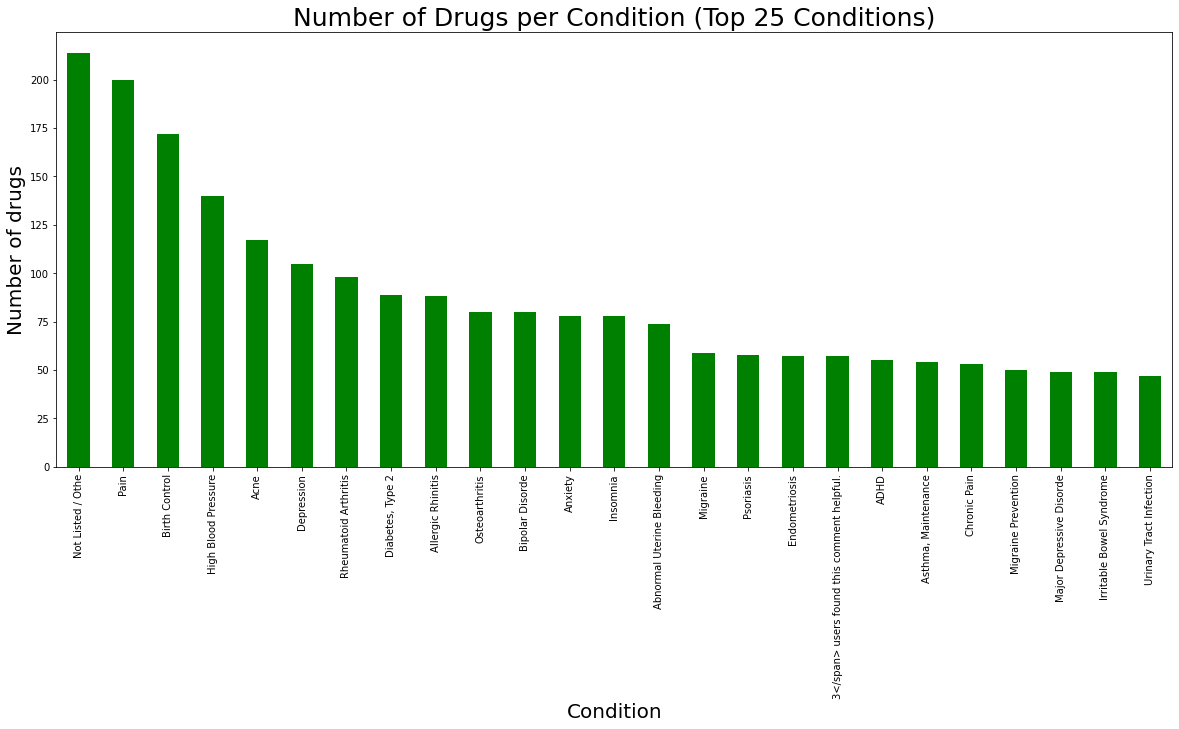

In [57]:
condition_df[0:25].plot(kind='bar', figsize=(20,8), fontsize=10, color='g')
plt.xlabel("Condition", fontsize=20)
plt.ylabel("Number of drugs", fontsize=20)
plt.title("Number of Drugs per Condition (Top 25 Conditions)", fontsize=25)
plt.show()

In [ ]:
ratings = df['rating'].value_counts().sort_values(ascending=False)

In [ ]:
ratings.plot(kind='bar', figsize=(8,5), fontsize=10, color='b')
plt.xlabel("Ratings", fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel("Number of Reviews", fontsize=15)
plt.title("Bar Chart (Ratings vs. Number of Reviews)", fontsize=20)
plt.show()

In [ ]:
colors1 = ['whitesmoke','lightsalmon','lightgreen','moccasin','powderblue','violet','lavender','pink','beige','lightcyan']
explode = np.full(shape=10, fill_value=0.05, dtype='float64')
ratings.plot.pie(labels=None, colors=colors1, autopct='%1.0f%%', pctdistance=0.85, explode=explode, startangle=90, figsize=(6,6))
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.legend(ratings.index, loc='center')
plt.xlabel("")
plt.ylabel("")
plt.title("Percentage of Ratings", fontsize=15)
plt.show()

In [ ]:
usefulDrugs = df.groupby(['drugName'])['usefulCount'].nunique().sort_values(ascending=False)

In [ ]:
usefulDrugs

In [ ]:
usefulDrugs[0:30].plot(kind='bar', figsize=(25,10), fontsize=10, color='slateblue')
plt.xlabel("Drug Name", fontsize=20)
plt.ylabel("Useful Count", fontsize=20)
plt.title("Useful Count of Top 30 Drugs", fontsize=25)
plt.show()

## Step6: Modeling
<hr style="color:#E1CF01">

In [58]:
from sklearn.cluster import KMeans

from time import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer


In [59]:
documents = df['review_clean'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)


ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

## Step7: NPL
<hr style="color:#E1CF01">